In [1]:
import numpy as np
import pandas as pd

In [2]:
# Reading data 
student_data_df = pd.read_csv("https://raw.githubusercontent.com/GirishaDevara/crrcoe/master/Files/Student_data.csv")
student_marks_df = pd.read_csv("https://raw.githubusercontent.com/GirishaDevara/crrcoe/master/Files/Student_marks")

In [3]:
student_marks_df

,Roll Number,Name,English,Maths,Science
0,423,Raj,45.0,89.0,92
1,545,Ram,NaN,78.0,90
2,377,Ravi,65.0,NaN,77
3,510,Lokesh,67.0,32.0,44
4,602,Roja,64.0,37.0,76


In [4]:
student_marks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
Roll Number    5 non-null int64
Name           5 non-null object
English        4 non-null float64
Maths          4 non-null float64
Science        5 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 280.0+ bytes


In [5]:
student_data_df

,Roll Number,College,Branch
0,510,SVCE,ECE
1,602,SVEC,IT
2,423,SVECW,MECH
3,545,SVU,IT
4,377,SVEC,IT


### filling null values

In [6]:
student_marks_df.columns[student_marks_df.dtypes != object]

Index(['Roll Number', 'English', 'Maths', 'Science'], dtype='object')

In [7]:
student_marks_df.dtypes

Roll Number      int64
Name            object
English        float64
Maths          float64
Science          int64
dtype: object

In [8]:
print('mean',student_marks_df.mean())
student_marks_df['Maths']

mean Roll Number    491.40
English         60.25
Maths           59.00
Science         75.80
dtype: float64


0    89.0
1    78.0
2     NaN
3    32.0
4    37.0
Name: Maths, dtype: float64

In [47]:
num_cols = student_marks_df.columns[student_marks_df.dtypes != object]
for col in num_cols:
    print(col)
    m = student_marks_df[col].mean()
    student_marks_df[col] = student_marks_df[col].fillna(m)

Roll Number
English
Maths
Science
Total


In [10]:
student_marks_df

,Roll Number,Name,English,Maths,Science
0,423,Raj,45.00,89.0,92
1,545,Ram,60.25,78.0,90
2,377,Ravi,65.00,59.0,77
3,510,Lokesh,67.00,32.0,44
4,602,Roja,64.00,37.0,76


In [50]:
student_data_df

,Roll Number,Clz,Branch
0,510,SVCE,ECE
1,602,SVEC,IT
2,423,SVECW,MECH
3,545,SVU,IT
4,377,SVEC,IT


In [11]:
student_data_df.dtypes

Roll Number     int64
College        object
Branch         object
dtype: object

In [48]:
student_data_df.describe()

,Roll Number
count,5.000000
mean,491.400000
std,91.127932
min,377.000000
25%,423.000000
50%,510.000000
75%,545.000000
max,602.000000


In [49]:
student_data_df.describe(include=object)

,Clz,Branch
count,5,5
unique,4,3
top,SVEC,IT
freq,2,3


### .nunique() it returns a series with number of unique observations, Can ignore NaN values.

In [13]:
student_data_df.nunique()

Roll Number    5
College        4
Branch         3
dtype: int64

In [14]:
student_data_df

,Roll Number,College,Branch
0,510,SVCE,ECE
1,602,SVEC,IT
2,423,SVECW,MECH
3,545,SVU,IT
4,377,SVEC,IT


In [15]:
student_data_df['College'].value_counts()

SVEC     2
SVECW    1
SVCE     1
SVU      1
Name: College, dtype: int64

In [52]:
student_data_df.Branch.value_counts()

IT      3
MECH    1
ECE     1
Name: Branch, dtype: int64

In [17]:
student_marks_df


,Roll Number,Name,English,Maths,Science
0,423,Raj,45.00,89.0,92
1,545,Ram,60.25,78.0,90
2,377,Ravi,65.00,59.0,77
3,510,Lokesh,67.00,32.0,44
4,602,Roja,64.00,37.0,76


In [57]:
student_marks_df['Total']=student_marks_df['Maths']+student_marks_df['English'] + student_marks_df['Science']
student_marks_df

,Roll Number,Name,English,Maths,Science,Total
0,423,Raj,45.00,89.0,92,226.00
1,545,Ram,60.25,78.0,90,228.25
2,377,Ravi,65.00,59.0,77,201.00
3,510,Lokesh,67.00,32.0,44,143.00
4,602,Roja,64.00,37.0,76,177.00


In [58]:
student_data_df

,Roll Number,Clz,Branch
0,510,SVCE,ECE
1,602,SVEC,IT
2,423,SVECW,MECH
3,545,SVU,IT
4,377,SVEC,IT


In [59]:
#student_data_df.columns = ['Roll Number','Clz',"Branch"]

In [60]:
pd.merge(student_marks_df,student_data_df,how='left',on = 'Roll Number')

,Roll Number,Name,English,Maths,Science,Total,Clz,Branch
0,423,Raj,45.00,89.0,92,226.00,SVECW,MECH
1,545,Ram,60.25,78.0,90,228.25,SVU,IT
2,377,Ravi,65.00,59.0,77,201.00,SVEC,IT
3,510,Lokesh,67.00,32.0,44,143.00,SVCE,ECE
4,602,Roja,64.00,37.0,76,177.00,SVEC,IT


In [28]:
pd.get_dummies(student_data_df)

,Roll Number,Clz_SVCE,Clz_SVEC,Clz_SVECW,Clz_SVU,Branch_ECE,Branch_IT,Branch_MECH
0,510,1,0,0,0,1,0,0
1,602,0,1,0,0,0,1,0
2,423,0,0,1,0,0,0,1
3,545,0,0,0,1,0,1,0
4,377,0,1,0,0,0,1,0


In [29]:
import matplotlib.pyplot as plt

In [30]:
student_marks_df['English']

0    45.00
1    60.25
2    65.00
3    67.00
4    64.00
Name: English, dtype: float64

(array([1., 0., 0., 0., 0., 0., 1., 0., 1., 2.]),
 array([45. , 47.2, 49.4, 51.6, 53.8, 56. , 58.2, 60.4, 62.6, 64.8, 67. ]),
 <a list of 10 Patch objects>)

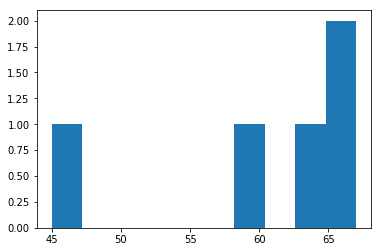

In [31]:
plt.hist(student_marks_df['English'])

In [32]:
key = student_data_df.Clz.value_counts().index
key

Index(['SVEC', 'SVECW', 'SVCE', 'SVU'], dtype='object')

In [33]:
values = student_data_df.Clz.value_counts()
values

SVEC     2
SVECW    1
SVCE     1
SVU      1
Name: Clz, dtype: int64

<BarContainer object of 4 artists>

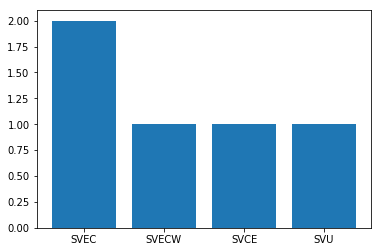

In [34]:
plt.bar(key,values)

In [35]:
import seaborn as sns

In [36]:
sns.__version__

'0.9.0'

- Importing Datasets
- Seaborn comes with a few important datasets in the library.

- When Seaborn is installed, the datasets download automatically.

- load_dataset()

- Importing Data as Pandas DataFrame

In [37]:
sns.get_dataset_names()

C:\Users\CMSEC029\Anaconda3\lib\site-packages\seaborn\utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file C:\Users\CMSEC029\Anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [38]:
df = sns.load_dataset('tips')
df.shape

(244, 7)

In [39]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [40]:
df.total_bill.mean()

19.785942622950824

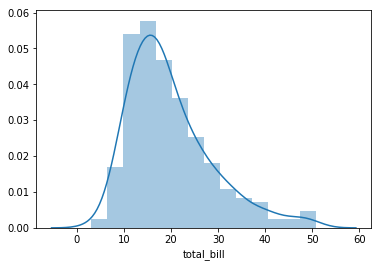

In [41]:
sns.distplot(df['total_bill'])

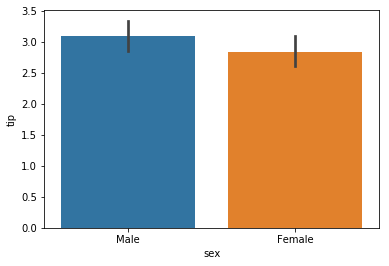

In [42]:
sns.barplot(df.sex,df.tip)

In [64]:
df[df.tip.idxmin():]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
68,20.23,2.01,Male,No,Sat,Dinner,2
69,15.01,2.09,Male,Yes,Sat,Dinner,2
70,12.02,1.97,Male,No,Sat,Dinner,2
71,17.07,3.00,Female,No,Sat,Dinner,3
72,26.86,3.14,Female,Yes,Sat,Dinner,2
73,25.28,5.00,Female,Yes,Sat,Dinner,2
74,14.73,2.20,Female,No,Sat,Dinner,2
75,10.51,1.25,Male,No,Sat,Dinner,2
76,17.92,3.08,Male,Yes,Sat,Dinner,2


In [44]:
df.tip.max(),df.tip.min(),df.tip.mean()

(10.0, 1.0, 2.9982786885245902)

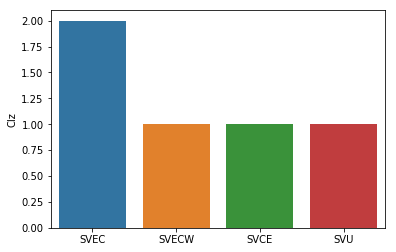

In [45]:
sns.barplot(key,values)

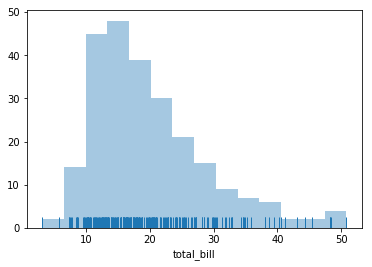

In [46]:
#This function combines the matplotlib hist function 
#(with automatic calculation of a good default bin size) 
#with the seaborn kdeplot() and rugplot() functions
#rug plot Plot datapoints in an array as sticks on an axis.
#kde plot Fit and plot a univariate or bivariate kernel density estimate
sns.distplot(df['total_bill'],kde = False,rug = True)